In [265]:
import math

In [266]:
import random
data = [(i, float(i)/500.0 + math.sin(float(i)/1.0)*random.uniform(0.95, 1.05)) for i in range(1000)]

In [267]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [268]:
xs, ys = zip(*data)

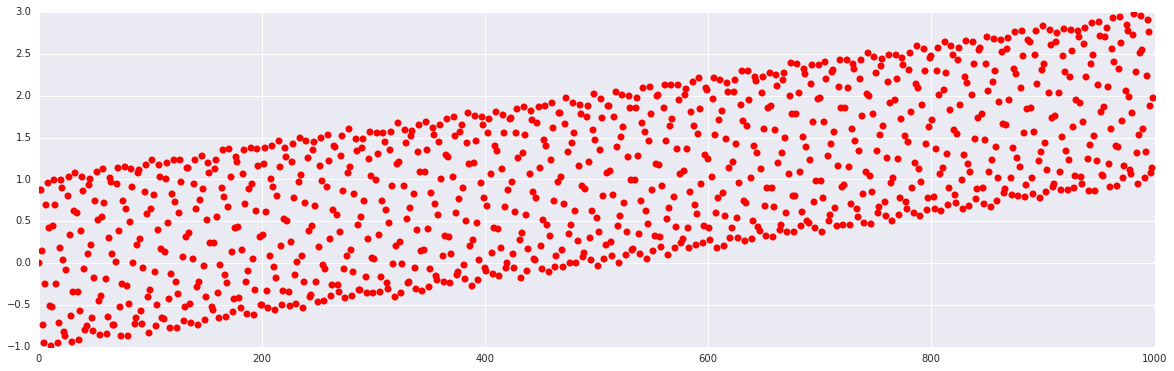

In [269]:
plt.plot(xs, ys, 'ro')
plt.show()

In [270]:
import scipy.fftpack
import numpy as np
yf = scipy.fftpack.fft(ys)
yf = [(el.real, el.imag)for el in list(yf)]
xsf, ysf = zip(*yf)
# xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

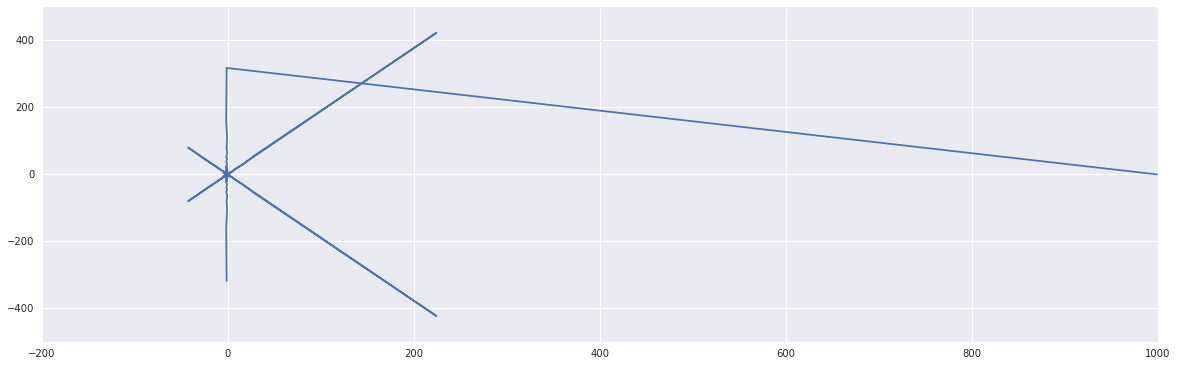

In [271]:
fig, ax = plt.subplots()
ax.plot(xsf, ysf)
plt.show()

In [272]:
# Do preliminary imports and notebook setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot styles
import seaborn; seaborn.set()

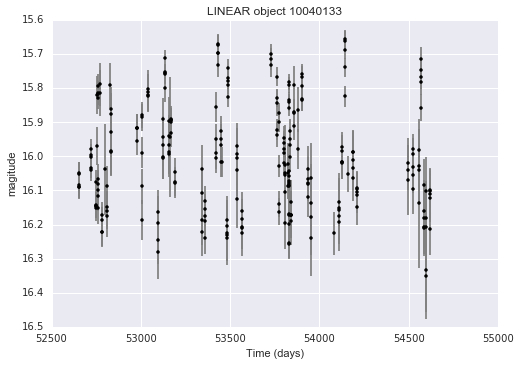

In [273]:
from astroML.datasets import fetch_LINEAR_sample
LINEAR_data = fetch_LINEAR_sample()
star_id = 10040133
t, mag, dmag = LINEAR_data.get_light_curve(star_id).T

fig, ax = plt.subplots()
ax.errorbar(t, mag, dmag, fmt='.k', ecolor='gray')
ax.set(xlabel='Time (days)', ylabel='magitude',
       title='LINEAR object {0}'.format(star_id))
ax.invert_yaxis();

Finding optimal frequency:
 - Estimated peak width = 0.00629
 - Using 5 steps per peak; omega_step = 0.00126
 - User-specified period range:  2 to 10
 - Computing periods at 2000 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
period = 6.28293983723


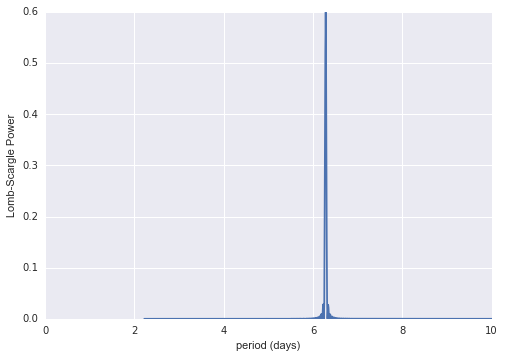

In [274]:
from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(xs, ys)
periods, power = model.periodogram_auto(nyquist_factor=0.9)

fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0, 10),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power');


# set range and find period
model.optimizer.period_range=(2, 10)
period = model.best_period
print("period = {0}".format(period))

In [275]:
2*math.pi

6.283185307179586